In [1]:
import numpy as np 
import pandas as pd 
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

Датасет - `bus_table.csv`
- `data` - дата
- `route` - название маршрута автобуса
- `direction` - направление маршрута
- `scheduled` - время прибыттия по расписанию
- `actual` - фактическое время прибытия

## Задание 1
Прочитайте файл, сохранив результаты в `df`. Посмотрите статистики и инфо.

In [2]:
df = pd.read_csv('bus_table.csv')
display(df.info())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 39157 entries, 0 to 39156
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   data       39157 non-null  object
 1   route      39157 non-null  object
 2   direction  39157 non-null  object
 3   scheduled  38917 non-null  object
 4   actual     39157 non-null  object
dtypes: object(5)
memory usage: 1.8+ MB


None

,data,route,direction,scheduled,actual
count,39157,39157,39157,38917,39157
unique,63,3,2,1356,27633
top,2016-04-14,A,north,23:00:25,08:08:24
freq,693,13358,19686,64,8


## Задание 2
Вырежте пропушеные данные (сохраните их в DataFrame `df_null`, они вам еще понадобятся) и удалите их из `df`. Выведите размерность `df_null`.

In [3]:
df_null = df[df.isna().any(axis=1)].reset_index(drop = True)
df_null

,data,route,direction,scheduled,actual
0,2016-04-01,A,south,NaN,16:00:57
1,2016-03-31,A,south,NaN,15:28:05
2,2016-03-30,A,south,NaN,14:52:36
3,2016-03-30,A,south,NaN,15:12:06
4,2016-03-29,A,south,NaN,17:56:29
...,...,...,...,...,...
235,2016-05-10,B,north,NaN,15:25:47
236,2016-05-10,B,north,NaN,17:44:05
237,2016-05-12,B,north,NaN,18:27:55
238,2016-05-13,B,north,NaN,19:04:25


In [4]:
df_null.shape

(240, 5)

In [5]:
df = df.dropna().reset_index(drop = True)
df

,data,route,direction,scheduled,actual
0,2016-03-26,A,south,01:11:57,01:13:19
1,2016-03-26,A,south,23:19:57,23:16:13
2,2016-03-26,A,south,21:19:57,21:18:46
3,2016-03-26,A,south,19:04:57,19:01:49
4,2016-03-26,A,south,16:42:57,16:42:39
...,...,...,...,...,...
38912,2016-05-27,B,north,10:50:25,10:49:50
38913,2016-05-27,B,north,13:02:27,13:07:10
38914,2016-05-27,B,north,15:14:29,15:15:55
38915,2016-05-27,B,north,17:26:29,17:25:40


## Задание 3
1. Добавьте столбец `table` дату/время прибытия автобусов по расписанию на остановку. 
2. Добавьте столбец `arrival` дату/временя актуального прибытия автобуса на остановку.


In [6]:
df['table'] =pd.to_datetime( df['data']+' '+df['scheduled'])
df['arrival'] =pd.to_datetime( df['data']+' '+df['actual'])

In [7]:
df

,data,route,direction,scheduled,actual,table,arrival
0,2016-03-26,A,south,01:11:57,01:13:19,2016-03-26 01:11:57,2016-03-26 01:13:19
1,2016-03-26,A,south,23:19:57,23:16:13,2016-03-26 23:19:57,2016-03-26 23:16:13
2,2016-03-26,A,south,21:19:57,21:18:46,2016-03-26 21:19:57,2016-03-26 21:18:46
3,2016-03-26,A,south,19:04:57,19:01:49,2016-03-26 19:04:57,2016-03-26 19:01:49
4,2016-03-26,A,south,16:42:57,16:42:39,2016-03-26 16:42:57,2016-03-26 16:42:39
...,...,...,...,...,...,...,...
38912,2016-05-27,B,north,10:50:25,10:49:50,2016-05-27 10:50:25,2016-05-27 10:49:50
38913,2016-05-27,B,north,13:02:27,13:07:10,2016-05-27 13:02:27,2016-05-27 13:07:10
38914,2016-05-27,B,north,15:14:29,15:15:55,2016-05-27 15:14:29,2016-05-27 15:15:55
38915,2016-05-27,B,north,17:26:29,17:25:40,2016-05-27 17:26:29,2016-05-27 17:25:40


## Задание 4
1. Найдите три самых часто встречаюшихся в расписании автобусов временных интервалов (естественно для каждой возможной пары номер маршрута-направление).

2. Добавьте в таблицу столбик `inteval` - интервал по расписаню между автобусами (естественно одного маршрута и направления) в МИНУТАХ.

3. Добавьте в таблицу столбик `arr_inteval` - интервал по фактическому между автобусами (естественно одного маршрута и направления) в МИНУТАХ.

#### 1 пункт
<br> diff() - вычисляет разность по заданной оси
1. сортируем значения по столбцу прибытия автобусов по расписанию
2. группируем по паре номер маршрута и направление
3. считаем разность с помощью diff() 
4. выводим топ 3 по каждому направлению и номеру маршрута

In [8]:
df_top_3 = df.copy()
df_top_3.sort_values(by = 'table', inplace=True)
df_top_3 = df_top_3.reset_index(drop = True)
df_top_3["interval"] = df_top_3['table']
df_top_3 = df_top_3.groupby(['route','direction'])['interval'].apply(lambda x: x.diff().value_counts().head(3))
df_top_3

route  direction                 
A      north      0 days 00:12:00    1434
                  0 days 00:15:00    1377
                  0 days 00:07:00     756
       south      0 days 00:15:00    1453
                  0 days 00:12:00    1312
                  0 days 00:08:00     710
B      north      0 days 00:15:00    1507
                  0 days 00:12:00    1413
                  0 days 00:08:00    1141
       south      0 days 00:15:00    1391
                  0 days 00:12:00    1300
                  0 days 00:08:00    1159
C      north      0 days 00:10:00    1869
                  0 days 00:15:00     590
                  0 days 00:06:00     552
       south      0 days 00:10:00    1342
                  0 days 00:12:00    1087
                  0 days 00:15:00    1049
Name: interval, dtype: int64

#### 2 пункт "интервал по расписанию"
1. сортируем значения по маршруту, направлению и времени прибытия по расписанию
2. после группировки и вычисления разности значения в минутах получаем с помощью "total_seconds() // 60"

In [9]:
df_interval = df.copy()
df_interval = df_interval.sort_values(by=['route', 'direction','table'])
df_interval 


,data,route,direction,scheduled,actual,table,arrival
19359,2016-03-26,A,north,00:00:25,00:05:01,2016-03-26 00:00:25,2016-03-26 00:05:01
19318,2016-03-26,A,north,00:30:25,00:30:19,2016-03-26 00:30:25,2016-03-26 00:30:19
19334,2016-03-26,A,north,01:05:25,01:10:15,2016-03-26 01:05:25,2016-03-26 01:10:15
19358,2016-03-26,A,north,02:10:25,02:19:10,2016-03-26 02:10:25,2016-03-26 02:19:10
19351,2016-03-26,A,north,05:25:28,05:24:49,2016-03-26 05:25:28,2016-03-26 05:24:49
...,...,...,...,...,...,...,...
9615,2016-05-27,C,south,22:33:59,22:38:37,2016-05-27 22:33:59,2016-05-27 22:38:37
9593,2016-05-27,C,south,22:48:59,22:48:23,2016-05-27 22:48:59,2016-05-27 22:48:23
9648,2016-05-27,C,south,23:03:59,23:05:18,2016-05-27 23:03:59,2016-05-27 23:05:18
9628,2016-05-27,C,south,23:23:59,23:29:38,2016-05-27 23:23:59,2016-05-27 23:29:38


In [10]:
df_interval['interval'] = df_interval.groupby(['route', 'direction']).table.diff().dt.total_seconds() // 60
df_interval

,data,route,direction,scheduled,actual,table,arrival,interval
19359,2016-03-26,A,north,00:00:25,00:05:01,2016-03-26 00:00:25,2016-03-26 00:05:01,NaN
19318,2016-03-26,A,north,00:30:25,00:30:19,2016-03-26 00:30:25,2016-03-26 00:30:19,30.0
19334,2016-03-26,A,north,01:05:25,01:10:15,2016-03-26 01:05:25,2016-03-26 01:10:15,35.0
19358,2016-03-26,A,north,02:10:25,02:19:10,2016-03-26 02:10:25,2016-03-26 02:19:10,65.0
19351,2016-03-26,A,north,05:25:28,05:24:49,2016-03-26 05:25:28,2016-03-26 05:24:49,195.0
...,...,...,...,...,...,...,...,...
9615,2016-05-27,C,south,22:33:59,22:38:37,2016-05-27 22:33:59,2016-05-27 22:38:37,13.0
9593,2016-05-27,C,south,22:48:59,22:48:23,2016-05-27 22:48:59,2016-05-27 22:48:23,15.0
9648,2016-05-27,C,south,23:03:59,23:05:18,2016-05-27 23:03:59,2016-05-27 23:05:18,15.0
9628,2016-05-27,C,south,23:23:59,23:29:38,2016-05-27 23:23:59,2016-05-27 23:29:38,20.0


 #### 3  пункт "интервал фактического времени прибытия автобуса на остановку"
 Решение аналогично пункту 2, за исключением того, что разница вычисляется теперь по столбцу фактического прибывания автобуса на остановку. <br>
 При изучении проблем и аномалий в данных обнаружились отрицательные значения в столбце интервала, отобр. фактическое время прибытия - поэтому на <br> данном этапе добавляется модуль для упрощения дальнейшей работы по устранению ошибок.<br>

In [11]:
df_arr = df_interval.copy()
df_arr = df_arr.sort_values(by=['route', 'direction','table'])
df_arr 

,data,route,direction,scheduled,actual,table,arrival,interval
19359,2016-03-26,A,north,00:00:25,00:05:01,2016-03-26 00:00:25,2016-03-26 00:05:01,NaN
19318,2016-03-26,A,north,00:30:25,00:30:19,2016-03-26 00:30:25,2016-03-26 00:30:19,30.0
19334,2016-03-26,A,north,01:05:25,01:10:15,2016-03-26 01:05:25,2016-03-26 01:10:15,35.0
19358,2016-03-26,A,north,02:10:25,02:19:10,2016-03-26 02:10:25,2016-03-26 02:19:10,65.0
19351,2016-03-26,A,north,05:25:28,05:24:49,2016-03-26 05:25:28,2016-03-26 05:24:49,195.0
...,...,...,...,...,...,...,...,...
9615,2016-05-27,C,south,22:33:59,22:38:37,2016-05-27 22:33:59,2016-05-27 22:38:37,13.0
9593,2016-05-27,C,south,22:48:59,22:48:23,2016-05-27 22:48:59,2016-05-27 22:48:23,15.0
9648,2016-05-27,C,south,23:03:59,23:05:18,2016-05-27 23:03:59,2016-05-27 23:05:18,15.0
9628,2016-05-27,C,south,23:23:59,23:29:38,2016-05-27 23:23:59,2016-05-27 23:29:38,20.0


In [12]:
df_arr['arr_interval'] = df_arr.groupby(['route', 'direction']).arrival.diff().abs().dt.total_seconds() // 60
df_arr

,data,route,direction,scheduled,actual,table,arrival,interval,arr_interval
19359,2016-03-26,A,north,00:00:25,00:05:01,2016-03-26 00:00:25,2016-03-26 00:05:01,NaN,NaN
19318,2016-03-26,A,north,00:30:25,00:30:19,2016-03-26 00:30:25,2016-03-26 00:30:19,30.0,25.0
19334,2016-03-26,A,north,01:05:25,01:10:15,2016-03-26 01:05:25,2016-03-26 01:10:15,35.0,39.0
19358,2016-03-26,A,north,02:10:25,02:19:10,2016-03-26 02:10:25,2016-03-26 02:19:10,65.0,68.0
19351,2016-03-26,A,north,05:25:28,05:24:49,2016-03-26 05:25:28,2016-03-26 05:24:49,195.0,185.0
...,...,...,...,...,...,...,...,...,...
9615,2016-05-27,C,south,22:33:59,22:38:37,2016-05-27 22:33:59,2016-05-27 22:38:37,13.0,15.0
9593,2016-05-27,C,south,22:48:59,22:48:23,2016-05-27 22:48:59,2016-05-27 22:48:23,15.0,9.0
9648,2016-05-27,C,south,23:03:59,23:05:18,2016-05-27 23:03:59,2016-05-27 23:05:18,15.0,16.0
9628,2016-05-27,C,south,23:23:59,23:29:38,2016-05-27 23:23:59,2016-05-27 23:29:38,20.0,24.0


анализируем полученные данные:

In [13]:
#на данном этапе была выявлена ошибка с отрицательными значениями реального интервала и исправлена выше.
all_real_time = list(df_arr.arr_interval.values)
all_real_time

[nan,
 25.0,
 39.0,
 68.0,
 185.0,
 21.0,
 13.0,
 17.0,
 9.0,
 20.0,
 13.0,
 13.0,
 18.0,
 11.0,
 13.0,
 17.0,
 8.0,
 10.0,
 18.0,
 9.0,
 12.0,
 10.0,
 14.0,
 11.0,
 8.0,
 18.0,
 11.0,
 6.0,
 22.0,
 6.0,
 15.0,
 9.0,
 7.0,
 16.0,
 8.0,
 15.0,
 7.0,
 20.0,
 7.0,
 16.0,
 8.0,
 20.0,
 0.0,
 14.0,
 16.0,
 13.0,
 7.0,
 10.0,
 10.0,
 15.0,
 12.0,
 3.0,
 22.0,
 4.0,
 15.0,
 11.0,
 16.0,
 12.0,
 6.0,
 12.0,
 7.0,
 17.0,
 15.0,
 3.0,
 14.0,
 13.0,
 12.0,
 15.0,
 5.0,
 20.0,
 5.0,
 17.0,
 16.0,
 17.0,
 18.0,
 10.0,
 17.0,
 13.0,
 17.0,
 9.0,
 19.0,
 9.0,
 18.0,
 14.0,
 10.0,
 23.0,
 12.0,
 12.0,
 1466.0,
 1412.0,
 37.0,
 72.0,
 187.0,
 17.0,
 17.0,
 11.0,
 18.0,
 14.0,
 14.0,
 10.0,
 17.0,
 14.0,
 16.0,
 11.0,
 17.0,
 13.0,
 21.0,
 3.0,
 21.0,
 13.0,
 12.0,
 17.0,
 13.0,
 14.0,
 18.0,
 15.0,
 14.0,
 12.0,
 18.0,
 13.0,
 13.0,
 17.0,
 13.0,
 13.0,
 21.0,
 12.0,
 14.0,
 14.0,
 13.0,
 15.0,
 15.0,
 13.0,
 15.0,
 17.0,
 14.0,
 10.0,
 18.0,
 14.0,
 11.0,
 21.0,
 10.0,
 29.0,
 6.0,
 14.0,
 13.0,
 11.0

окей, мы видим отрицательные значения...но как реальный интервал между автобусами может быть отрицательным? 
выведем датафрейм с отрицательными значениями реального интервала. Видим достаточно много строк с данной проблемой. причем где-то эти отрицательные значения довольно большие. <br>
помимо больших отрицательных есть и большие положительные значения. <br>
выведем их:

In [14]:
mask =df_arr[ df_arr['arr_interval']>1440]
mask

,data,route,direction,scheduled,actual,table,arrival,interval,arr_interval
20239,2016-03-27,A,north,00:00:25,23:59:48,2016-03-27 00:00:25,2016-03-27 23:59:48,30.0,1466.0
19749,2016-04-01,A,north,00:00:25,23:58:15,2016-04-01 00:00:25,2016-04-01 23:58:15,30.0,1465.0
22206,2016-04-05,A,north,00:00:25,23:59:38,2016-04-05 00:00:25,2016-04-05 23:59:38,30.0,1470.0
21900,2016-04-08,A,north,00:00:25,23:58:11,2016-04-08 00:00:25,2016-04-08 23:58:11,30.0,1469.0
28861,2016-04-11,A,north,00:00:25,23:59:39,2016-04-11 00:00:25,2016-04-11 23:59:39,30.0,1468.0
...,...,...,...,...,...,...,...,...,...
11234,2016-05-11,C,south,00:23:59,00:27:03,2016-05-11 00:23:59,2016-05-11 00:27:03,30.0,1464.0
10874,2016-05-14,C,south,00:27:59,00:25:52,2016-05-14 00:27:59,2016-05-14 00:25:52,34.0,1457.0
10187,2016-05-21,C,south,00:27:59,00:30:37,2016-05-21 00:27:59,2016-05-21 00:30:37,34.0,1467.0
9824,2016-05-25,C,south,00:23:59,00:26:11,2016-05-25 00:23:59,2016-05-25 00:26:11,30.0,1464.0


#### причины возникновения ошибок в данных
Болшие значения возникают там, где есть проблема с датой. обратим внимание на строку с индексом 20239 - мы видим, что по расписанию автобус должен был <br> приехать 27 числа в 00:25, а фактически приехал 26 числа в 23:59, но дата стоит единая для этих двух интервалов - а значит фактическое время <br> прибытия оказывается будто на сутки позже. это и дает пробему при расчете разницы между значениями. Кроме того, ниже эта проблема возникнет еще и в расчете времени опоздания автобуса. <br>
исправлять буду ниже.

## Задание 5
Найдите время в минутах для опоздания авдобуса (+ задержка, - раньше расписания)

In [15]:
df_arr['late_arrival'] = (df_arr['arrival'] - df_arr['table'])
df_arr['late_arrival'] = df_arr['late_arrival'].dt.total_seconds()//60
df_arr

,data,route,direction,scheduled,actual,table,arrival,interval,arr_interval,late_arrival
19359,2016-03-26,A,north,00:00:25,00:05:01,2016-03-26 00:00:25,2016-03-26 00:05:01,NaN,NaN,4.0
19318,2016-03-26,A,north,00:30:25,00:30:19,2016-03-26 00:30:25,2016-03-26 00:30:19,30.0,25.0,-1.0
19334,2016-03-26,A,north,01:05:25,01:10:15,2016-03-26 01:05:25,2016-03-26 01:10:15,35.0,39.0,4.0
19358,2016-03-26,A,north,02:10:25,02:19:10,2016-03-26 02:10:25,2016-03-26 02:19:10,65.0,68.0,8.0
19351,2016-03-26,A,north,05:25:28,05:24:49,2016-03-26 05:25:28,2016-03-26 05:24:49,195.0,185.0,-1.0
...,...,...,...,...,...,...,...,...,...,...
9615,2016-05-27,C,south,22:33:59,22:38:37,2016-05-27 22:33:59,2016-05-27 22:38:37,13.0,15.0,4.0
9593,2016-05-27,C,south,22:48:59,22:48:23,2016-05-27 22:48:59,2016-05-27 22:48:23,15.0,9.0,-1.0
9648,2016-05-27,C,south,23:03:59,23:05:18,2016-05-27 23:03:59,2016-05-27 23:05:18,15.0,16.0,1.0
9628,2016-05-27,C,south,23:23:59,23:29:38,2016-05-27 23:23:59,2016-05-27 23:29:38,20.0,24.0,5.0


исправим ошибку в значениях задержки автобусов (или прибытия раньше расписания).<br>
отмечу, что в этой колонке важно сохранить знак, поэтому нельзя применить модуль ко всей колонке<br>
1440 - количество минут в сутках. Вычисление остатка от деления на кол-во минут в сутках позволит убрать ошибочно возникающие лишние сутки в интервалах <br>У нас есть аномально высокие значения, которые начинаются с 400* и идут до 1440 и отдельная группа значений больше суток<br>
*400 это порог, выше которого видны все аномальные данные<br>
Для работы с первым промежутком мы используем модуль, а затем даем всем значениям отриц. знак для вычисления остатка от деления на сутки.<br>
Для работы со второй группой, превышающей сутки, минус уже не нужен.<br>
Таким образом мы исправляем значения, превышающие порог аномалий, не затрагивая основную массу строк (в общем кол-ве строк, превыщающем 38 тысяч, <br> аномальных 167 изначально).

In [16]:
df_arr['late_arrival'] = df_arr['late_arrival'].map(lambda x: (-np.abs(x)) % 1440 if (400<np.abs(x)<=1440) else(np.abs((x))%1440 if np.abs(x)>1440 else x))
df_arr

,data,route,direction,scheduled,actual,table,arrival,interval,arr_interval,late_arrival
19359,2016-03-26,A,north,00:00:25,00:05:01,2016-03-26 00:00:25,2016-03-26 00:05:01,NaN,NaN,4.0
19318,2016-03-26,A,north,00:30:25,00:30:19,2016-03-26 00:30:25,2016-03-26 00:30:19,30.0,25.0,-1.0
19334,2016-03-26,A,north,01:05:25,01:10:15,2016-03-26 01:05:25,2016-03-26 01:10:15,35.0,39.0,4.0
19358,2016-03-26,A,north,02:10:25,02:19:10,2016-03-26 02:10:25,2016-03-26 02:19:10,65.0,68.0,8.0
19351,2016-03-26,A,north,05:25:28,05:24:49,2016-03-26 05:25:28,2016-03-26 05:24:49,195.0,185.0,-1.0
...,...,...,...,...,...,...,...,...,...,...
9615,2016-05-27,C,south,22:33:59,22:38:37,2016-05-27 22:33:59,2016-05-27 22:38:37,13.0,15.0,4.0
9593,2016-05-27,C,south,22:48:59,22:48:23,2016-05-27 22:48:59,2016-05-27 22:48:23,15.0,9.0,-1.0
9648,2016-05-27,C,south,23:03:59,23:05:18,2016-05-27 23:03:59,2016-05-27 23:05:18,15.0,16.0,1.0
9628,2016-05-27,C,south,23:23:59,23:29:38,2016-05-27 23:23:59,2016-05-27 23:29:38,20.0,24.0,5.0


Ниже я исправляю ошибки, возникающие в расчетах интервалов, используя аналогичный подход, за исключением того, что модуль был применен в п.3 №4. (из-за того, что по умолчанию интервалы положительные.)<br>


In [17]:
df_arr['interval'] = df_arr['interval'].map(lambda x: (-x) % 1440 if x > 400 else x)
df_arr['arr_interval'] = df_arr['arr_interval'].map(lambda x: (-x) % 1440 if (400<x<1440) else((x)%1440 if x>1440 else x))
df_arr

,data,route,direction,scheduled,actual,table,arrival,interval,arr_interval,late_arrival
19359,2016-03-26,A,north,00:00:25,00:05:01,2016-03-26 00:00:25,2016-03-26 00:05:01,NaN,NaN,4.0
19318,2016-03-26,A,north,00:30:25,00:30:19,2016-03-26 00:30:25,2016-03-26 00:30:19,30.0,25.0,-1.0
19334,2016-03-26,A,north,01:05:25,01:10:15,2016-03-26 01:05:25,2016-03-26 01:10:15,35.0,39.0,4.0
19358,2016-03-26,A,north,02:10:25,02:19:10,2016-03-26 02:10:25,2016-03-26 02:19:10,65.0,68.0,8.0
19351,2016-03-26,A,north,05:25:28,05:24:49,2016-03-26 05:25:28,2016-03-26 05:24:49,195.0,185.0,-1.0
...,...,...,...,...,...,...,...,...,...,...
9615,2016-05-27,C,south,22:33:59,22:38:37,2016-05-27 22:33:59,2016-05-27 22:38:37,13.0,15.0,4.0
9593,2016-05-27,C,south,22:48:59,22:48:23,2016-05-27 22:48:59,2016-05-27 22:48:23,15.0,9.0,-1.0
9648,2016-05-27,C,south,23:03:59,23:05:18,2016-05-27 23:03:59,2016-05-27 23:05:18,15.0,16.0,1.0
9628,2016-05-27,C,south,23:23:59,23:29:38,2016-05-27 23:23:59,2016-05-27 23:29:38,20.0,24.0,5.0


после всех преобразований проводим проверку и смотрим, остались ли где-то значения, превыщающие аномалии (и остались ли большие знач. с отриц. знаком)<br>
видим, что мы убрали все аномальные данные

In [18]:
mask_1 = df_arr[df_arr['late_arrival'] > 400] 
mask_2 = df_arr[df_arr['late_arrival'] < -400]
mask_3 = df_arr[df_arr['interval'] < -400] 
mask_4 = df_arr[df_arr['interval'] > 400] 
mask_5 = df_arr[df_arr['arr_interval'] > 400] 
mask_6 = df_arr[df_arr['arr_interval'] <- 400] 
display(mask_1)
display(mask_2)
display(mask_3)
display(mask_4)
display(mask_5)
display(mask_6)

,data,route,direction,scheduled,actual,table,arrival,interval,arr_interval,late_arrival


,data,route,direction,scheduled,actual,table,arrival,interval,arr_interval,late_arrival


,data,route,direction,scheduled,actual,table,arrival,interval,arr_interval,late_arrival


,data,route,direction,scheduled,actual,table,arrival,interval,arr_interval,late_arrival


,data,route,direction,scheduled,actual,table,arrival,interval,arr_interval,late_arrival


,data,route,direction,scheduled,actual,table,arrival,interval,arr_interval,late_arrival


In [19]:
mask_1 = df_arr[df_arr['late_arrival'] > 400] 
mask_2 = df_arr[df_arr['late_arrival'] < 0]
mask_3 = df_arr[df_arr['interval'] < 0] 
mask_4 = df_arr[df_arr['interval'] > 400] 
mask_5 = df_arr[df_arr['arr_interval'] > 400] 
mask_6 = df_arr[df_arr['arr_interval'] <0] 
display(mask_1)
display(mask_2)
display(mask_3)
display(mask_4)
display(mask_5)
display(mask_6)

,data,route,direction,scheduled,actual,table,arrival,interval,arr_interval,late_arrival


,data,route,direction,scheduled,actual,table,arrival,interval,arr_interval,late_arrival
19318,2016-03-26,A,north,00:30:25,00:30:19,2016-03-26 00:30:25,2016-03-26 00:30:19,30.0,25.0,-1.0
19351,2016-03-26,A,north,05:25:28,05:24:49,2016-03-26 05:25:28,2016-03-26 05:24:49,195.0,185.0,-1.0
19377,2016-03-26,A,north,06:00:28,05:59:21,2016-03-26 06:00:28,2016-03-26 05:59:21,15.0,13.0,-2.0
19333,2016-03-26,A,north,06:30:28,06:26:04,2016-03-26 06:30:28,2016-03-26 06:26:04,15.0,9.0,-5.0
19383,2016-03-26,A,north,07:00:28,06:59:35,2016-03-26 07:00:28,2016-03-26 06:59:35,15.0,13.0,-1.0
...,...,...,...,...,...,...,...,...,...,...
9612,2016-05-27,C,south,13:57:59,13:56:00,2016-05-27 13:57:59,2016-05-27 13:56:00,10.0,0.0,-2.0
9633,2016-05-27,C,south,14:41:59,14:41:33,2016-05-27 14:41:59,2016-05-27 14:41:33,14.0,9.0,-1.0
9657,2016-05-27,C,south,18:11:59,18:10:33,2016-05-27 18:11:59,2016-05-27 18:10:33,12.0,0.0,-2.0
9565,2016-05-27,C,south,18:46:59,18:43:37,2016-05-27 18:46:59,2016-05-27 18:43:37,11.0,6.0,-4.0


,data,route,direction,scheduled,actual,table,arrival,interval,arr_interval,late_arrival


,data,route,direction,scheduled,actual,table,arrival,interval,arr_interval,late_arrival


,data,route,direction,scheduled,actual,table,arrival,interval,arr_interval,late_arrival


,data,route,direction,scheduled,actual,table,arrival,interval,arr_interval,late_arrival


In [20]:
df_arr['late_arrival'].value_counts()

late_arrival
-1.0      6500
 0.0      5996
 1.0      4663
-2.0      4573
 2.0      3256
          ... 
-13.0        1
 82.0        1
 144.0       1
 48.0        1
 68.0        1
Name: count, Length: 81, dtype: int64

## Задание 6
1. Постройте максимально качественные гистограммы (или их аналоги) для разницы интервалов между автобусами для различных маршрутов и направлений.

2. Постройте максимально качественные гистограммы (или их аналоги) времени опоздания автобуса в зависимости от маршрута и направления.

   Увидели абсурд - возращаемся к началу и латаем код ;)

#### 1 пункт 

найдем все уникальные комбинации маршрута и направления для построения отдельных графиков:

In [21]:
unique_combinations = df[['route', 'direction']].drop_duplicates().values
unique_combinations

array([['A', 'south'],
       ['C', 'south'],
       ['B', 'south'],
       ['A', 'north'],
       ['C', 'north'],
       ['B', 'north']], dtype=object)

графики для интервалов по расписанию:

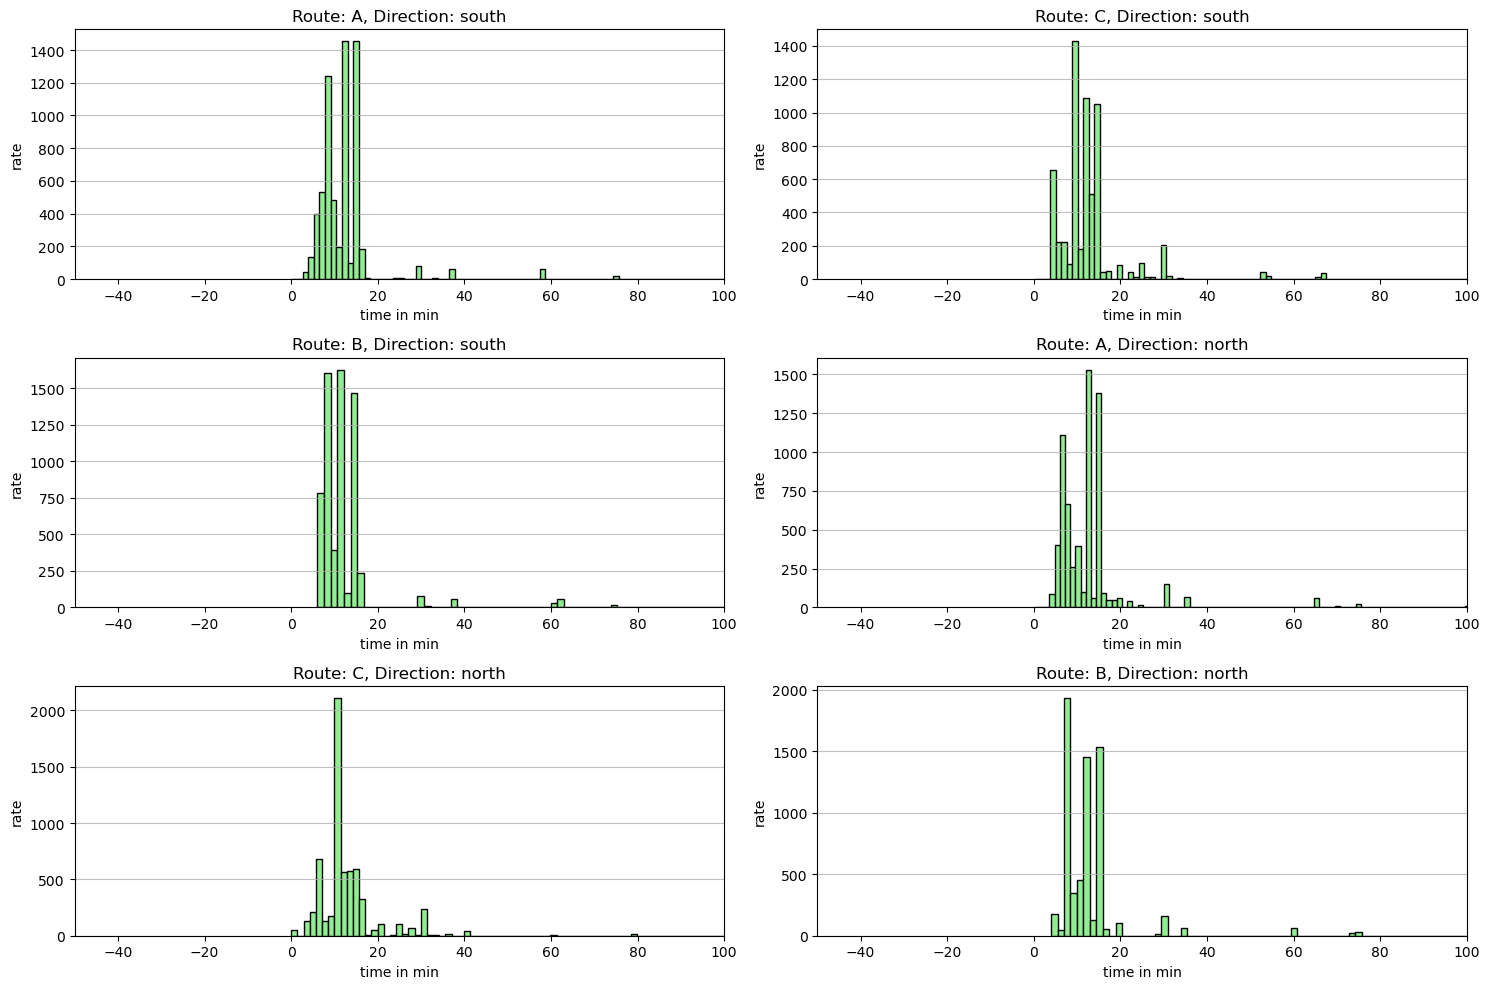

In [22]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize = (15,10), sharex=False, sharey=False)
ax =  ax.flatten()
for i, (route, direction) in enumerate(unique_combinations):
    combination = df_arr[(df_arr['route'] == route) & (df_arr['direction'] == direction)]
    ax[i].hist(combination['interval'], bins=200, color='lightgreen', edgecolor='black')
    ax[i].set_title(f'Route: {route}, Direction: {direction}')
    ax[i].set_xlabel('time in min') 
    ax[i].set_ylabel('rate')
    ax[i].grid(axis='y', alpha=0.8)
    ax[i].set_xlim(-50, 100)
    
    






plt.tight_layout()
plt.show() 

графики для фактических интервалов

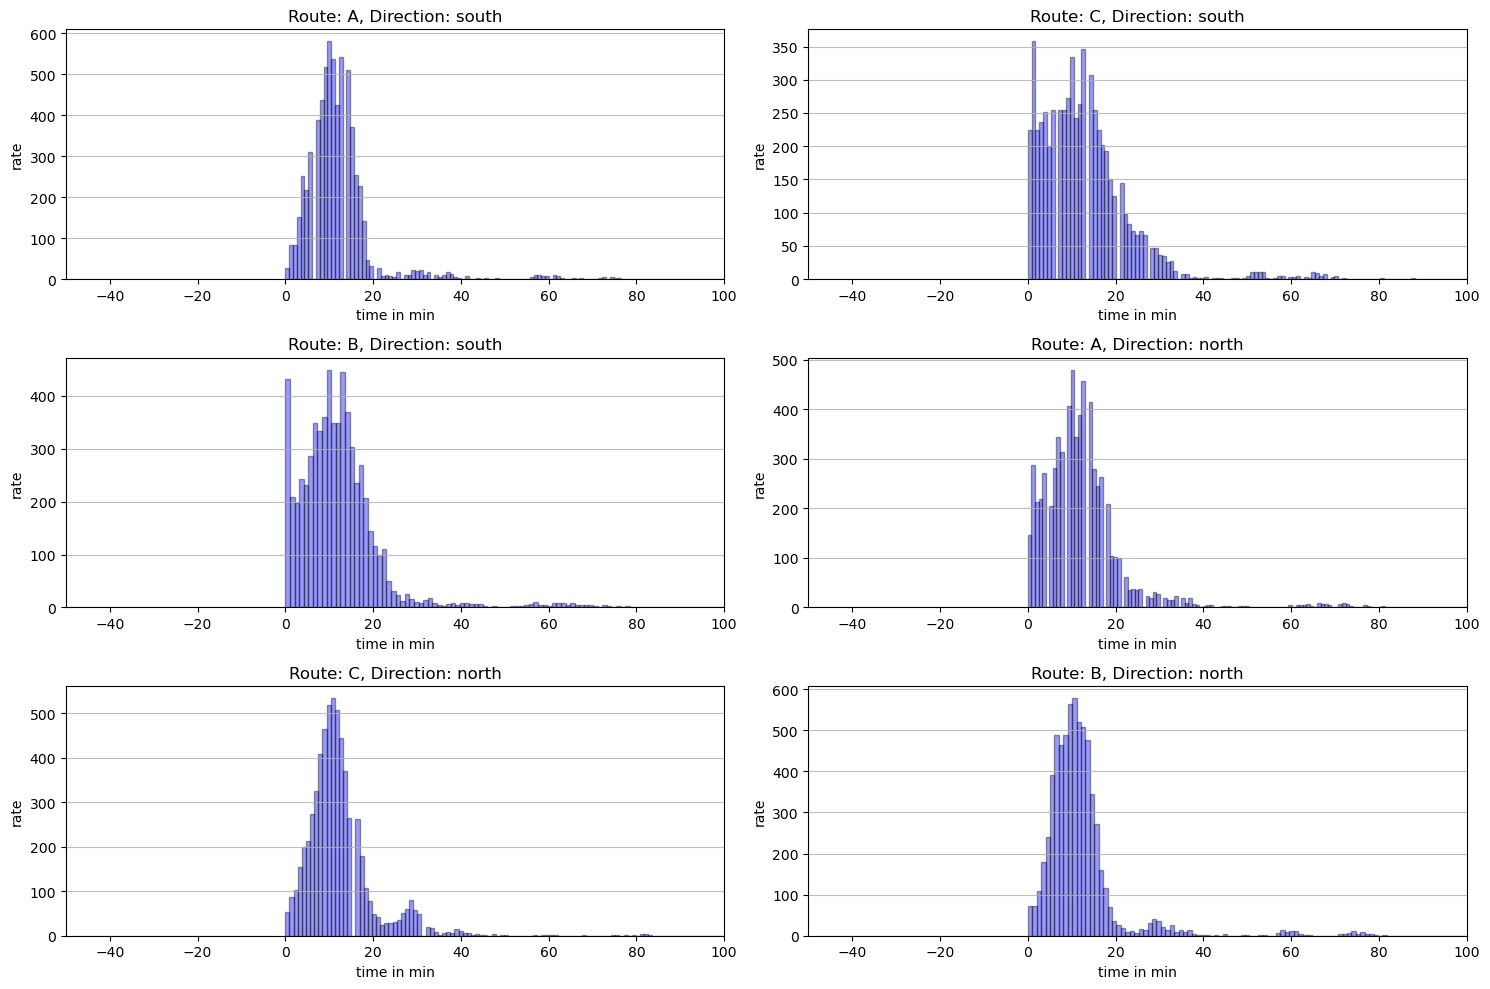

In [23]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize = (15,10), sharex=False, sharey=False)
ax =  ax.flatten()
for i, (route, direction) in enumerate(unique_combinations):
    combination = df_arr[(df_arr['route'] == route) & (df_arr['direction'] == direction)]
    ax[i].hist(combination['arr_interval'], bins=300, color='blue', alpha = 0.4, edgecolor='black')
    ax[i].set_title(f'Route: {route}, Direction: {direction}')
    ax[i].set_xlabel('time in min') 
    ax[i].set_ylabel('rate')
    ax[i].grid(axis='y', alpha=0.8)
    ax[i].set_xlim(-50, 100)









plt.tight_layout()
plt.show() 

 #### 2 пункт

графики для задержек (или прибытия раньше расписания)

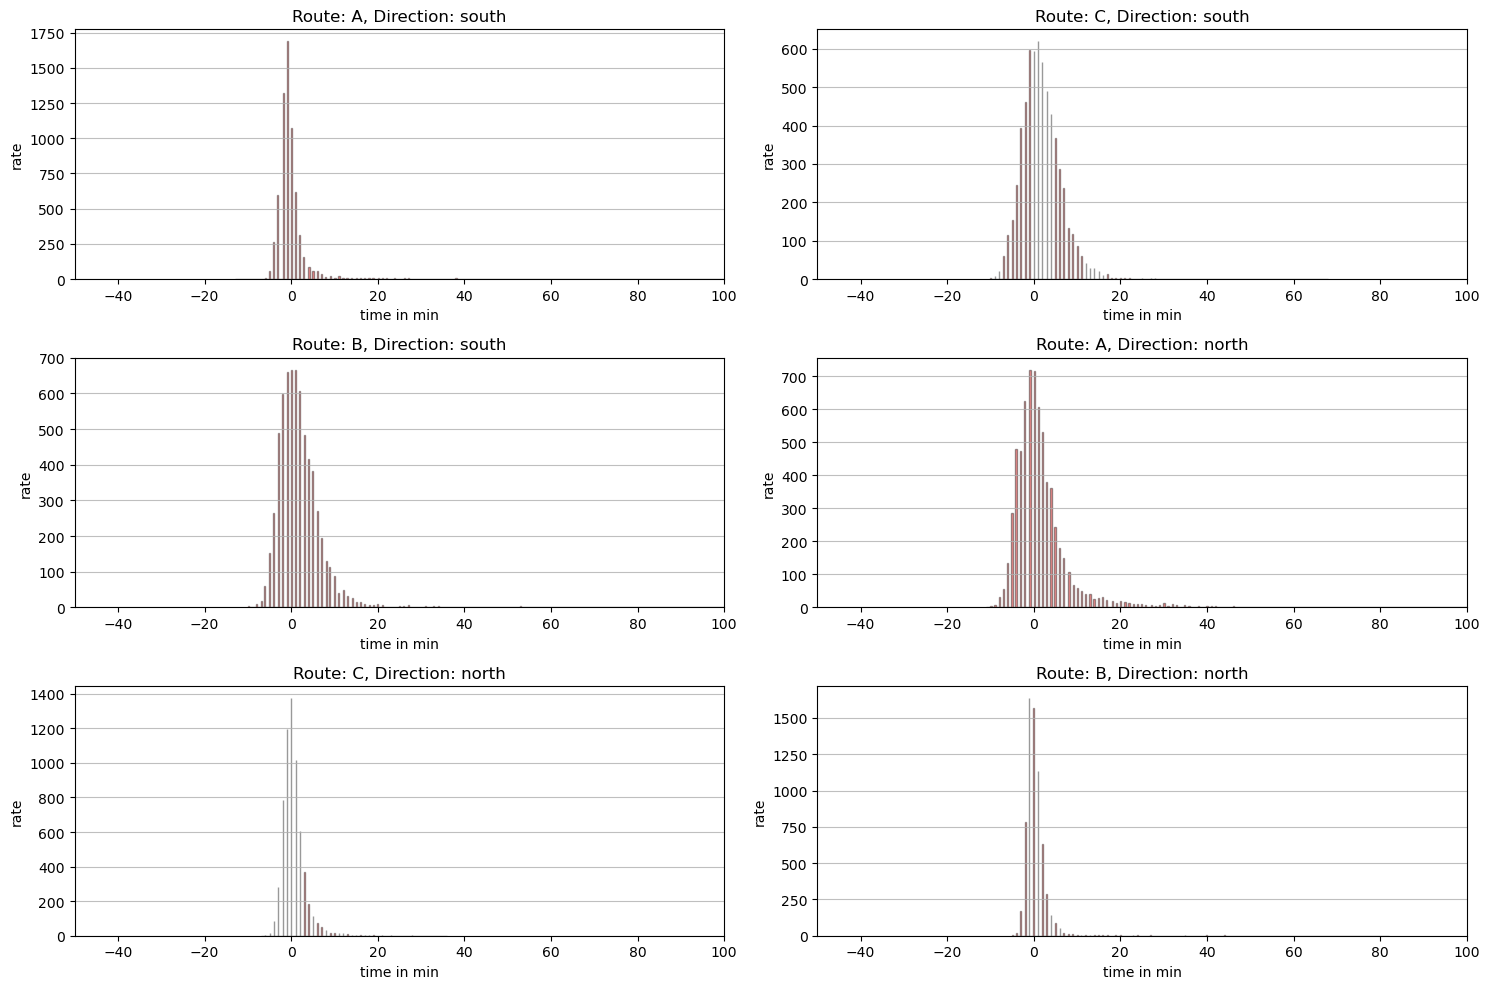

In [24]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize = (15,10), sharex=False, sharey=False)
ax =  ax.flatten()
for i, (route, direction) in enumerate(unique_combinations):
    combination = df_arr[(df_arr['route'] == route) & (df_arr['direction'] == direction)]
    ax[i].hist(combination['late_arrival'], bins=500, color='red', alpha = 0.4, edgecolor='black')
    ax[i].set_title(f'Route: {route}, Direction: {direction}')
    ax[i].set_xlabel('time in min') 
    ax[i].set_ylabel('rate')
    ax[i].grid(axis='y', alpha=0.8)
    ax[i].set_xlim(-50, 100)
    






plt.tight_layout()
plt.show() 

#### Можно, что либо сказать о маршрутах автобусов содержательно?

1) мы видим, что графиков автобусов по расписанию укладываются в сравнительно небольшое количество разбиений, в то время как время фактических <br> интервалов между автобусами (2 группа графиков) имеет куда больше возможных значений. - это реалистично, т.к. интервалы по расписанию устанавливаются <br> всегда примерно одинаковые, а фактические данные всегда разнятся.
2) по графикам задержки мы видим, что значительно преобладает задержка около нуля и нулевая, что говорит о том, что чаще всего автобусы ходят в соответсвии с расписанием.
3) мы видим и в 1 группе графиков и во 2 группе графиков небольшие группы значений интервалов, которые лежат в промежутке от 60 до 80 минут - это ночные интервалы в движении автобусов - и опять же, мы видим, что здесь также автобусы ночью в среднем приезжают в соответствии с расписанием. - я показываю это ниже (см. night_intervals и night_arr_intervals)
4) отмечу, что по графикам также видно, что бОльшая часть интервалов между автобусами укладывается в 20 минут, а наиболее распространенный интервал для всех автобусов (причем как по расписанию, так и фактический - около 10 минут)

In [25]:
night_intervals = df_arr[df_arr['interval']>60]
night_intervals

,data,route,direction,scheduled,actual,table,arrival,interval,arr_interval,late_arrival
19358,2016-03-26,A,north,02:10:25,02:19:10,2016-03-26 02:10:25,2016-03-26 02:19:10,65.0,68.0,8.0
19351,2016-03-26,A,north,05:25:28,05:24:49,2016-03-26 05:25:28,2016-03-26 05:24:49,195.0,185.0,-1.0
20238,2016-03-27,A,north,02:10:25,02:17:11,2016-03-27 02:10:25,2016-03-27 02:17:11,65.0,72.0,6.0
20261,2016-03-27,A,north,05:25:28,05:25:01,2016-03-27 05:25:28,2016-03-27 05:25:01,195.0,187.0,-1.0
20122,2016-03-28,A,north,02:10:25,02:08:58,2016-03-28 02:10:25,2016-03-28 02:08:58,65.0,64.0,-2.0
...,...,...,...,...,...,...,...,...,...,...
9841,2016-05-25,C,south,05:08:59,05:09:50,2016-05-25 05:08:59,2016-05-25 05:09:50,135.0,133.0,0.0
9692,2016-05-26,C,south,02:53:59,02:52:08,2016-05-26 02:53:59,2016-05-26 02:52:08,67.0,67.0,-2.0
9679,2016-05-26,C,south,05:08:59,05:11:55,2016-05-26 05:08:59,2016-05-26 05:11:55,135.0,139.0,2.0
9591,2016-05-27,C,south,02:53:59,02:57:14,2016-05-27 02:53:59,2016-05-27 02:57:14,67.0,69.0,3.0


In [26]:
night_arr_intervals = df_arr[df_arr['arr_interval']>60]
night_arr_intervals

,data,route,direction,scheduled,actual,table,arrival,interval,arr_interval,late_arrival
19358,2016-03-26,A,north,02:10:25,02:19:10,2016-03-26 02:10:25,2016-03-26 02:19:10,65.0,68.0,8.0
19351,2016-03-26,A,north,05:25:28,05:24:49,2016-03-26 05:25:28,2016-03-26 05:24:49,195.0,185.0,-1.0
20238,2016-03-27,A,north,02:10:25,02:17:11,2016-03-27 02:10:25,2016-03-27 02:17:11,65.0,72.0,6.0
20261,2016-03-27,A,north,05:25:28,05:25:01,2016-03-27 05:25:28,2016-03-27 05:25:01,195.0,187.0,-1.0
20122,2016-03-28,A,north,02:10:25,02:08:58,2016-03-28 02:10:25,2016-03-28 02:08:58,65.0,64.0,-2.0
...,...,...,...,...,...,...,...,...,...,...
9841,2016-05-25,C,south,05:08:59,05:09:50,2016-05-25 05:08:59,2016-05-25 05:09:50,135.0,133.0,0.0
9692,2016-05-26,C,south,02:53:59,02:52:08,2016-05-26 02:53:59,2016-05-26 02:52:08,67.0,67.0,-2.0
9679,2016-05-26,C,south,05:08:59,05:11:55,2016-05-26 05:08:59,2016-05-26 05:11:55,135.0,139.0,2.0
9591,2016-05-27,C,south,02:53:59,02:57:14,2016-05-27 02:53:59,2016-05-27 02:57:14,67.0,69.0,3.0


## Задание финальное ... для тех кто может
Давайте попробуем заполнить пропущенные данные в расписании  - `df_null`. Как это сделать правильно?

In [27]:
df_null

,data,route,direction,scheduled,actual
0,2016-04-01,A,south,NaN,16:00:57
1,2016-03-31,A,south,NaN,15:28:05
2,2016-03-30,A,south,NaN,14:52:36
3,2016-03-30,A,south,NaN,15:12:06
4,2016-03-29,A,south,NaN,17:56:29
...,...,...,...,...,...
235,2016-05-10,B,north,NaN,15:25:47
236,2016-05-10,B,north,NaN,17:44:05
237,2016-05-12,B,north,NaN,18:27:55
238,2016-05-13,B,north,NaN,19:04:25


добавим в наш основной датасет номер недели для более точного подбора приближенных значений времени прибытия автобуса по расписанию для df_null

In [28]:
df_arr['day_of_week'] = df_arr['table'].map(lambda x: x.weekday())
df_arr

,data,route,direction,scheduled,actual,table,arrival,interval,arr_interval,late_arrival,day_of_week
19359,2016-03-26,A,north,00:00:25,00:05:01,2016-03-26 00:00:25,2016-03-26 00:05:01,NaN,NaN,4.0,5
19318,2016-03-26,A,north,00:30:25,00:30:19,2016-03-26 00:30:25,2016-03-26 00:30:19,30.0,25.0,-1.0,5
19334,2016-03-26,A,north,01:05:25,01:10:15,2016-03-26 01:05:25,2016-03-26 01:10:15,35.0,39.0,4.0,5
19358,2016-03-26,A,north,02:10:25,02:19:10,2016-03-26 02:10:25,2016-03-26 02:19:10,65.0,68.0,8.0,5
19351,2016-03-26,A,north,05:25:28,05:24:49,2016-03-26 05:25:28,2016-03-26 05:24:49,195.0,185.0,-1.0,5
...,...,...,...,...,...,...,...,...,...,...,...
9615,2016-05-27,C,south,22:33:59,22:38:37,2016-05-27 22:33:59,2016-05-27 22:38:37,13.0,15.0,4.0,4
9593,2016-05-27,C,south,22:48:59,22:48:23,2016-05-27 22:48:59,2016-05-27 22:48:23,15.0,9.0,-1.0,4
9648,2016-05-27,C,south,23:03:59,23:05:18,2016-05-27 23:03:59,2016-05-27 23:05:18,15.0,16.0,1.0,4
9628,2016-05-27,C,south,23:23:59,23:29:38,2016-05-27 23:23:59,2016-05-27 23:29:38,20.0,24.0,5.0,4


теперь создадим столбец в формате дата в df_null и на основе него получим столбец с днями недели уже в датасете df_null

In [29]:
df_null['Data'] =pd.to_datetime( df_null['data']+' '+df_null['actual'])

In [30]:
df_null['day_of_week'] = df_null['Data'].map(lambda x: x.weekday())
df_null

,data,route,direction,scheduled,actual,Data,day_of_week
0,2016-04-01,A,south,NaN,16:00:57,2016-04-01 16:00:57,4
1,2016-03-31,A,south,NaN,15:28:05,2016-03-31 15:28:05,3
2,2016-03-30,A,south,NaN,14:52:36,2016-03-30 14:52:36,2
3,2016-03-30,A,south,NaN,15:12:06,2016-03-30 15:12:06,2
4,2016-03-29,A,south,NaN,17:56:29,2016-03-29 17:56:29,1
...,...,...,...,...,...,...,...
235,2016-05-10,B,north,NaN,15:25:47,2016-05-10 15:25:47,1
236,2016-05-10,B,north,NaN,17:44:05,2016-05-10 17:44:05,1
237,2016-05-12,B,north,NaN,18:27:55,2016-05-12 18:27:55,3
238,2016-05-13,B,north,NaN,19:04:25,2016-05-13 19:04:25,4


Создадим функцию, которая будет подбирать наиболее близкое к пропущенному значению scheduled с помощью данных основного датасета, ориентируясь на совпадение маршрута, направления и дня недели. <br>
на основе этого из отфильтрованного внутри функции датасета filtred_df будет подбираться наиболее близкое значение к значению actual в df_null

In [31]:
def optimal_scheduled(route,direction,day_of_week,actual):
    filtred_df = df_arr[(df_arr['route'] == route) & (df_arr['direction'] == direction) & (df_arr['day_of_week'] == day_of_week)]
    opt_scheduled = filtred_df[filtred_df['scheduled'] > actual]['scheduled'].min()
    return opt_scheduled

apply позволит нам реализовать функцию для каждой строке в датасете df_null и заполнить столбец scheduled.

In [32]:
df_null['scheduled'] = df_null.apply(lambda x: optimal_scheduled(x.route,x.direction, x.day_of_week, x.actual),axis=1)

In [33]:
df_null

,data,route,direction,scheduled,actual,Data,day_of_week
0,2016-04-01,A,south,16:01:56,16:00:57,2016-04-01 16:00:57,4
1,2016-03-31,A,south,15:31:56,15:28:05,2016-03-31 15:28:05,3
2,2016-03-30,A,south,14:55:56,14:52:36,2016-03-30 14:52:36,2
3,2016-03-30,A,south,15:17:56,15:12:06,2016-03-30 15:12:06,2
4,2016-03-29,A,south,17:58:56,17:56:29,2016-03-29 17:56:29,1
...,...,...,...,...,...,...,...
235,2016-05-10,B,north,15:26:29,15:25:47,2016-05-10 15:25:47,1
236,2016-05-10,B,north,17:49:29,17:44:05,2016-05-10 17:44:05,1
237,2016-05-12,B,north,18:33:27,18:27:55,2016-05-12 18:27:55,3
238,2016-05-13,B,north,19:12:25,19:04:25,2016-05-13 19:04:25,4


In [34]:
df_arr.describe()

,table,arrival,interval,arr_interval,late_arrival,day_of_week
count,38917,38917,38911.000000,38911.000000,38917.000000,38917.000000
mean,2016-04-26 18:28:35.094046208,2016-04-26 18:28:46.243441152,13.964149,13.701447,0.993191,2.758229
min,2016-03-26 00:00:25,2016-03-26 00:02:35,0.000000,0.000000,-13.000000,0.000000
25%,2016-04-11 07:23:31,2016-04-11 07:23:14,8.000000,7.000000,-1.000000,1.000000
50%,2016-04-26 17:05:29,2016-04-26 17:06:58,12.000000,11.000000,0.000000,3.000000
75%,2016-05-12 12:57:28,2016-05-12 12:54:17,15.000000,15.000000,2.000000,4.000000
max,2016-05-27 23:59:58,2016-05-27 23:57:15,314.000000,314.000000,150.000000,6.000000
std,NaN,NaN,17.422623,17.918920,4.954836,1.918060
